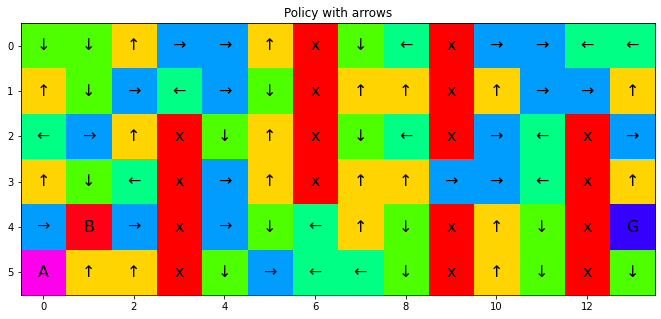

Current Agent need to move: →


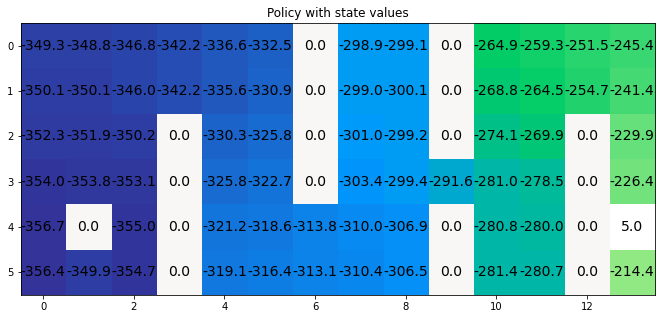

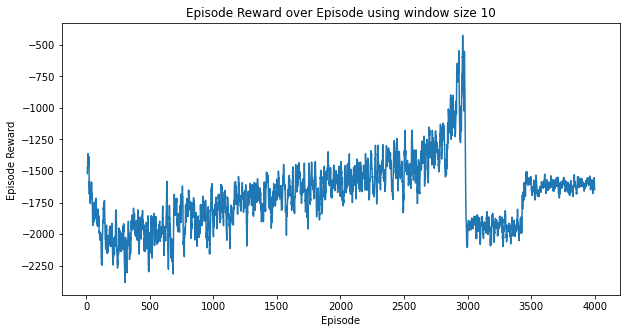

In [1]:
from environment import CliffBoxPushingBase
from collections import defaultdict
import itertools
import numpy as np
import random
from collections import namedtuple
from matplotlib import pyplot as plt
import pandas as pd
import math

################################ Convert coordinate to a number Eg:(5,0) >>> 70 ##############

def observation(state):
    return state[0] * 14 + state[1]
    
###################### plot the values according to the box location #############

def value_table(col, row, agent, box):
    box_x = box[0]
    box_y = box[1]
    a_list = []
    agent_location = observation(agent)
    box_location = observation(box)
    for i in range(col):
        for j in range (row):
            a_list.append(np.max(Q[(i,j),(box_x,box_y)]))
            
    a_list[31] = 0
    a_list[45] = 0
    a_list[59] = 0
    a_list[73] = 0
    
    a_list[6] = 0
    a_list[20] = 0
    a_list[34] = 0
    a_list[48] = 0 
    
    a_list[9] = 0
    a_list[23] = 0
    a_list[37] = 0
    a_list[65] = 0 
    a_list[79] = 0 
    
    a_list[40] = 0
    a_list[54] = 0
    a_list[68] = 0
    a_list[82] = 0
    
    a_list[69] = 5
    plot_values(a_list)

###################### plot the policy according to the box location #############

def policy_table(col, row, agent, box):
    box_x = box[0]
    box_y = box[1]
    agent_x=agent[0]
    agent_y=agent[1]
    a_list = []
    agent_location = observation(agent)
    box_location = observation(box)
    action_space = [1,2,3,4]
    for i in range(col):
        for j in range (row):
            a_list.append(action_space[np.argmax(Q[(i,j),(box_x,box_y)])])
            
    agent_curr_location = action_space[np.argmax(Q[(agent_x,agent_y),(box_x,box_y)])]
    
    a_list[31] = 0
    a_list[45] = 0
    a_list[59] = 0
    a_list[73] = 0
    
    a_list[6] = 0
    a_list[20] = 0
    a_list[34] = 0
    a_list[48] = 0 
    
    a_list[9] = 0
    a_list[23] = 0
    a_list[37] = 0
    a_list[65] = 0 
    a_list[79] = 0 
    
    a_list[40] = 0
    a_list[54] = 0
    a_list[68] = 0
    a_list[82] = 0
    
    a_list[69] = 5
    a_list[agent_location] = 6
    a_list[box_location] = 7
    
    plot_policy(a_list)
    
    arrows = ['x', '↑', '↓', '←', '→']
    print('Current Agent need to move:',arrows[agent_curr_location])
    
####################### Plot policy with arrow ##################################

def plot_policy(policy):
    
    arrows = ['x', '↑', '↓', '←', '→', 'G', 'A', 'B']
    policy = np.reshape(policy, (6,14))
    fig = plt.figure(figsize=(16,5))
    ax = fig.add_subplot(111)
    im = ax.imshow(policy, cmap='hsv')
    
    for (y,x),labels in np.ndenumerate(policy):
        arrows_label = (arrows[labels])
        ax.text(x, y, arrows_label, ha='center', va='center', fontsize=16)
    plt.title('Policy with arrows')
    plt.show()
    
####################### Plot policy with values ##################################

def plot_values(value):
    value = np.reshape(value, (6,14))

    fig = plt.figure(figsize=(16,5))
    ax = fig.add_subplot(111)
    im = ax.imshow(value, cmap='terrain')
    for (y,x),labels in np.ndenumerate(value):
        labels = np.round(labels,1)
        ax.text(x, y ,labels, ha='center', va='center', fontsize=14)
    plt.title('Policy with state values')
    plt.show()
    
########################## plot episode reward vs episode ##########################

def plot(stats, win_len = 10):
    
    fig = plt.figure(figsize=(10,5))
    
    rewards_pandas = pd.Series(stats.episode_rewards)
    rewards_win_none = rewards_pandas.rolling(win_len).mean()
    
    plt.plot(rewards_win_none)
    plt.xlabel("Episode")
    plt.ylabel("Episode Reward ")
    plt.title("Episode Reward over Episode using window size 10")
    
    return fig

####################################### epsilon decay #############################################

def e_decay(epsilon_start, epsilon_end, epsilon_decay, i):
    new_epsilon = epsilon_end + (epsilon_start - epsilon_end) *  math .exp(-1. * i / epsilon_decay)
    return new_epsilon

#################################### Different type of learning rate decay #########################

def step_decay(initial_lr, i,decay_rate):
    
    lrate = initial_lr * (1/(1 + decay_rate * i))
    return lrate

def expo_decay (initial_lr, i, decay_rate):
    lrate = initial_lr * math.pow(decay_rate,i)
    return lrate

##################################################### SARSA #####################################

class QAgent(object):
    def __init__(self):
        self.action_space = [1,2,3,4]
#         self.V = []
        self.Q = defaultdict(lambda: np.zeros(len(self.action_space)))
        self.discount_factor=0.98
        self.alpha=0.32
        self.epsilon=0.001
        
    def take_action(self, state):
        if random.random() < self.epsilon:
            action = random.choice(self.action_space)
        else:
            action = self.action_space[np.argmax(self.Q[state])]
            
        return action

    def train(self, state, action, next_state, next_action, reward):
        
        action = action -1
        next_action = next_action -1
        predict = self.Q[state][action]
        target = reward + self.discount_factor * self.Q[next_state][next_action]
        self.Q[state][action] = (1 - self.alpha) * predict + self.alpha * (target)
        return reward, state, self.Q


if __name__ == '__main__':
    env = CliffBoxPushingBase()
    # you can implement other algorithms
    agent = QAgent()
    teminated = False
    rewards = []
    time_step = 0
    num_iterations = 4000
    box = [4,1]
    Agent = [5,0]
    episode_plot = namedtuple("Stats",["episode_rewards"])
    
    stats = episode_plot(episode_rewards = np.zeros(num_iterations))  
    
    for i in range(num_iterations):
        
####################### learning rate decay and epsilon decay #########
    
        agent.alpha = step_decay (0.35, i, 0.00009)
        agent.epsilon = e_decay(0.001, 0.0005,100, i)
        
#####################################################################
    
        env.reset()    
        while not teminated:
            state = env.get_state()
            
            next_action = agent.take_action(state)
            action = next_action
            reward, teminated, _ = env.step([action])
           
            stats.episode_rewards[i] += reward
            
            next_state = env.get_state()
            rewards.append(reward)
            
         
            time_step += 1
            next_action = agent.take_action(next_state)

            reward, state, Q = agent.train(state, action, next_state, next_action, reward)
            
################# To print the optimal path = shortest path possible to reach goal ################    

            if state[0] == (3, 13) and state[1] == (3,13):
                env_action = env.episode_actions
                num_env_action = len(env_action)
#                 if num_env_action <43:
#                     print(i, num_env_action)
#                 else:
#                     pass

        teminated = False
        rewards = []
        
################################ plot policy with arrow, policy with values and stats ####################
    
    policy_table(6, 14, Agent, box) # Input the Agent and box location to see the arrows for that location example: (5,0) to (4,1)
    value_table(6, 14, Agent, box) # Input the Agent and box location to see the values for that location example: (5,0) to (4,1)
    plot(stats)      
